## DEDICATED SQL POOL

- A dedicated SQL pool is a data warehousing platform that provides a collection of analytic resources for storing and analyzing large amounts of data. It's part of Azure Synapse boundary.

- You can host a SQL data warehouse with the help of the dedicated SQL pool.
- With the Serverless SQL pool, you can just define the table schema. The data itself resides in external storage.
- But if you need to persist the data in actual tables and query them via SQL, we need to have a SQL data warehouse in place.
- The data warehouse gets dedicated compute and storage. The data in the tables are stored in columar format which reduces data storage costs and improves the query performance.

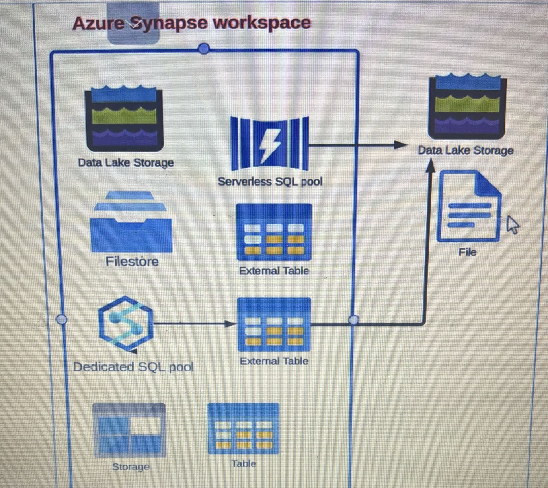

1. LAB SQL POOL External Table
- We are going to first see how to use external tables in the dedicated SQL pool.
- Now why would you want to create an external table when you have a dedicated pool where you can define persistent tables with data.
- One use case is wherein you need to bring the data from an Azure Data Lake account into the dedicated pool. You then create an external table to the data source. And then define a persistent table in the dedicated SQL pool and pull in the data via the use of the external table.

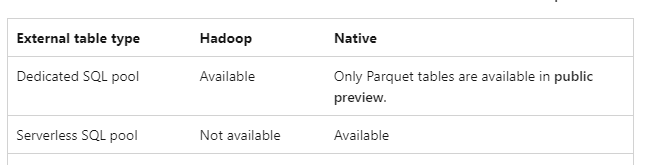

To read more in detail : https://learn.microsoft.com/en-us/azure/synapse-analytics/sql/develop-tables-external-tables?tabs=hadoop

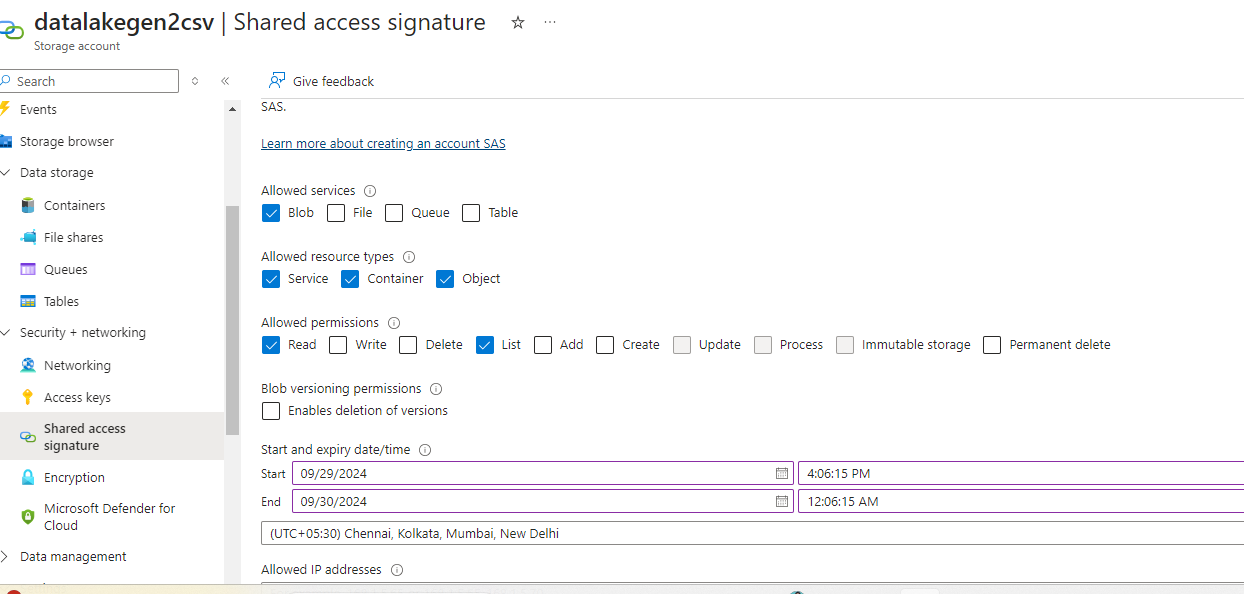

## 5. Lab - SQL Pool - External Tables - CSV

CREATE MASTER KEY ENCRYPTION BY PASSWORD = 'P@ssword@123'


CREATE DATABASE SCOPED CREDENTIAL sasToken
WITH IDENTITY ='SHARED ACCESS SIGNATURE',
SECRET='sv=2022-11-02&ss=b&srt=sco&sp=rl&se=2024-06-13T11:24:49Z&st=2024-06-13T03:24:49Z&spr=https&sig=PL01eMQrJ1hUwlMFz%2FC9weQVD6WrTQPH9UuTOaQH4iE%3D'



CREATE EXTERNAL DATA SOURCE srcActivityLog
WITH 
(
    LOCATION='abfss://data@datalakegen2csv.blob.core.windows.net',
    TYPE = HADOOP,
     CREDENTIAL=sasToken
)


Location = 'abss:://containername@datalakegen2accountname.blob.core.windows.net



CREATE EXTERNAL FILE FORMAT delimitedTxtFileFormat WITH
(
    FORMAT_TYPE=DELIMITEDTEXT,
    FORMAT_OPTIONS(
        FIELD_TERMINATOR=',',
        FIRST_ROW=2
    )
)


CREATE EXTERNAL TABLE ActivityLog
(
   [Correlationid] varchar(200),
   [Operationname] varchar(300),
   [Status] varchar(100),
   [Eventcategory] varchar(100),
   [Level] varchar(100),
   [Time] varchar(100),
   [Subscription] varchar(200),
   [Eventinitiatedby] varchar(1000),
   [Resourcetype] varchar(300),
   [Resourcegroup] varchar(1000),
   [Resource] varchar(2000))
WITH (
    LOCATION='/ActivityLog01.csv',
    DATA_SOURCE=srcActivityLog,
    FILE_FORMAT=delimitedTxtFileFormat
)



SELECT * FROM ActivityLog;

## Some points to be remember

File or Folder  starting _ or . is considered as hidden and cannot be read using above technique


To Read more code go to temp and Azure_synapse_analytics folder

### Loading data into a table - COPY Command - CSV

CREATE TABLE PoolActivityLog
(
   [Correlationid] varchar(200),
   [Operationname] varchar(300),
   [Status] varchar(100),
   [Eventcategory] varchar(100),
   [Level] varchar(100),
   [Time] varchar(100),
   [Subscription] varchar(200),
   [Eventinitiatedby] varchar(1000),
   [Resourcetype] varchar(300),
   [Resourcegroup] varchar(1000),
   [Resource] varchar(2000)
)
WITH(
    DISTRIBUTION=ROUND_ROBIN
)




COPY INTO PoolActivityLog
FROM 'https://datalake50000.blob.core.windows.net/data/ActivityLog01.csv'
WITH(
    FILE_TYPE='CSV',
    FIRSTROW=2,
    CREDENTIAL=
    (
        IDENTITY='Shared Access Signature',
        SECRET='sv=2022-11-02&ss=b&srt=sco&sp=rl&se=2024-06-13T11:24:49Z&st=2024-06-13T03:24:49Z&spr=https&sig=PL01eMQrJ1hUwlMFz%2FC9weQVD6WrTQPH9UuTOaQH4iE%3D'
    )
);

## Distribution Types

A distributed table appears as a single table, but the rows are actually stored across 60 distributions. The rows are distributed with a hash or round-robin algorithm.

<b> Hash distributed </b> 


A hash-distributed table distributes table rows across the Compute nodes by using a deterministic hash function to assign each row to one distribution.

Consider using a hash-distributed table when:

The table size on disk is more than 2 GB.
The table has frequent insert, update, and delete operations.

<b> Round-robin distributed </b>
A round-robin distributed table distributes table rows evenly across all distributions. The assignment of rows to distributions is random. Unlike hash-distributed tables, rows with equal values are not guaranteed to be assigned to the same distribution.

Consider using the round-robin distribution for your table in the following scenarios:

When getting started as a simple starting point since it is the default
If there is no obvious joining key
If there is no good candidate column for hash distributing the table
If the table does not share a common join key with other tables
If the join is less significant than other joins in the query
When the table is a temporary staging table


## CREDENTITAL Details

In Azure Synapse, the main types of credentials include: Microsoft Entra (Azure Active Directory) user credentials, Service Principal credentials, Managed Identities (system-assigned or user-assigned), Shared Access Signatures (SAS), and database-scoped credentials which can be used to access external data sources depending on the authentication method required by the source system; with the default authentication method being Microsoft Entra pass-through. 


Key points about these credential types: 


-   Microsoft Entra User Credentials:<br>
This is a standard user account within your Azure Active Directory that can be used to access Synapse. 


-   Service Principal:
A security principal representing an application that can be used to authenticate to Azure Synapse. 


-   Managed Identities:
A security feature where an Azure service like Synapse can access other Azure resources without requiring separate credentials, either using a system-assigned identity (automatically created with the Synapse workspace) or a user-assigned identity (created separately). 


-   Shared Access Signature (SAS):
A temporary access token used to grant access to Azure Storage resources like blob containers. 

-   Database-Scoped Credentials:
Allows you to store credentials within a specific database in Synapse, enabling access to external data sources. 

## Loading data - Pipelines storage account

Following are the stpes to be done shown in image.
<br> In this we are using existing table to copy to Table.

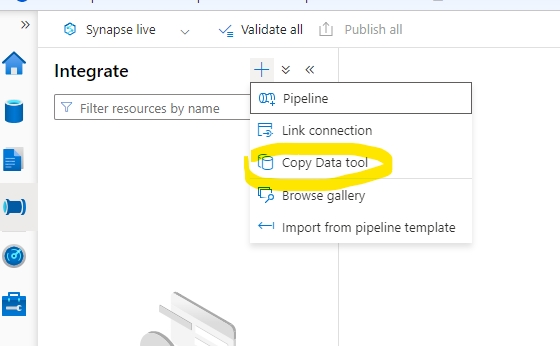

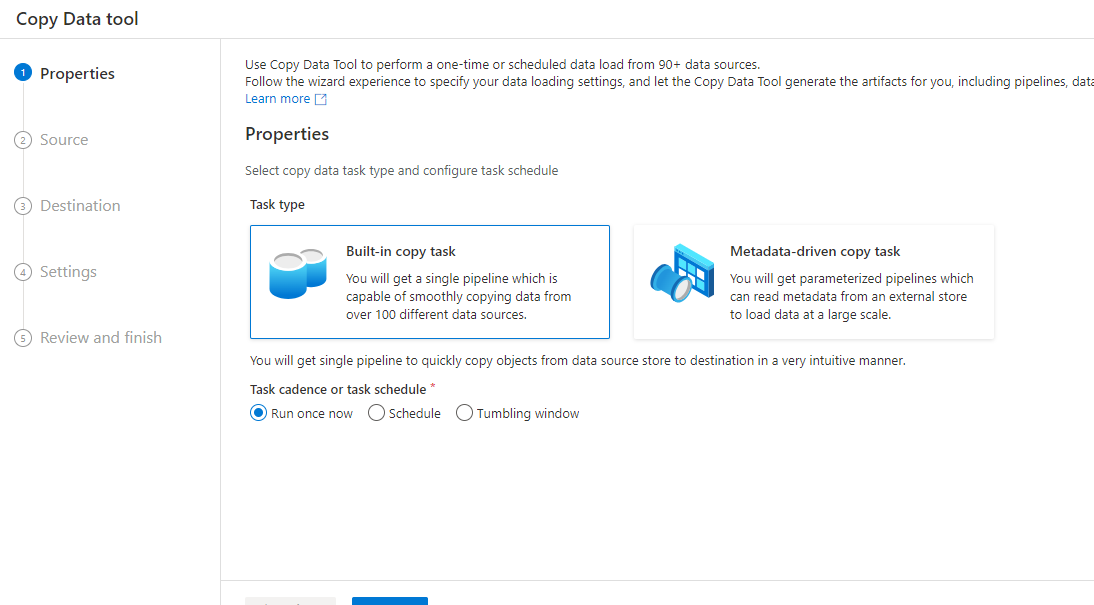

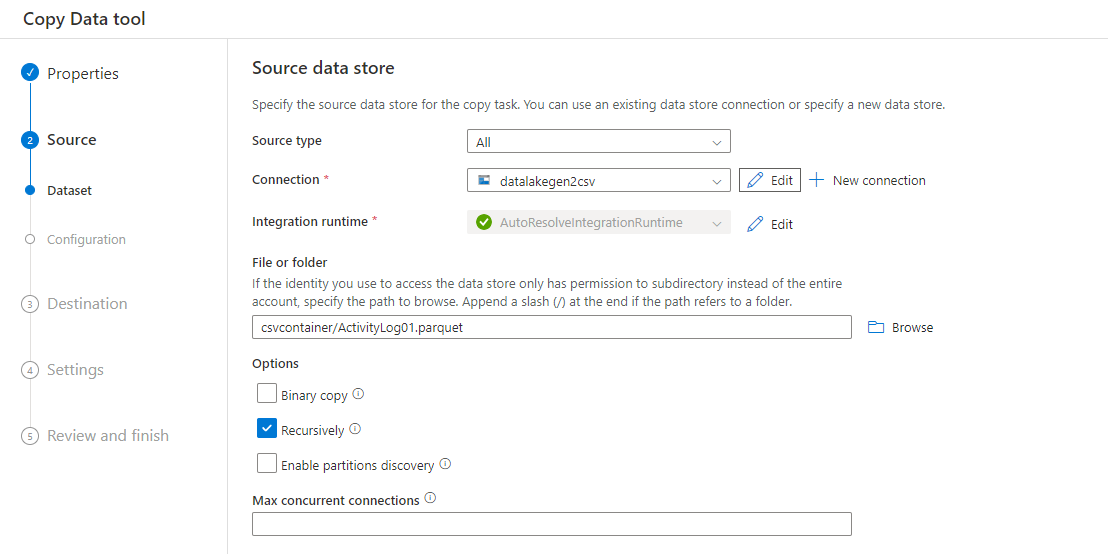

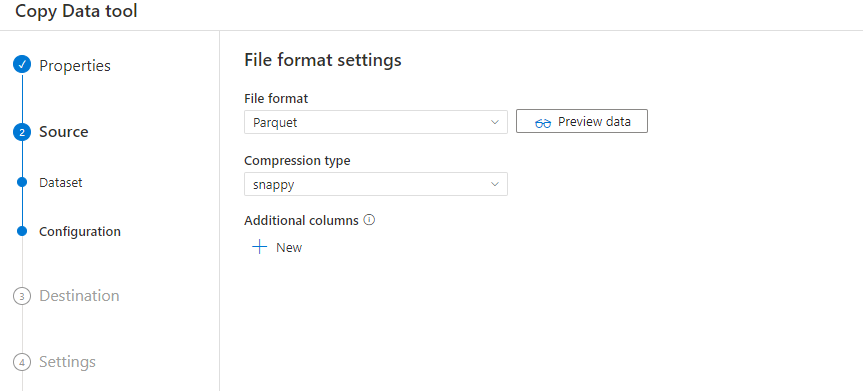

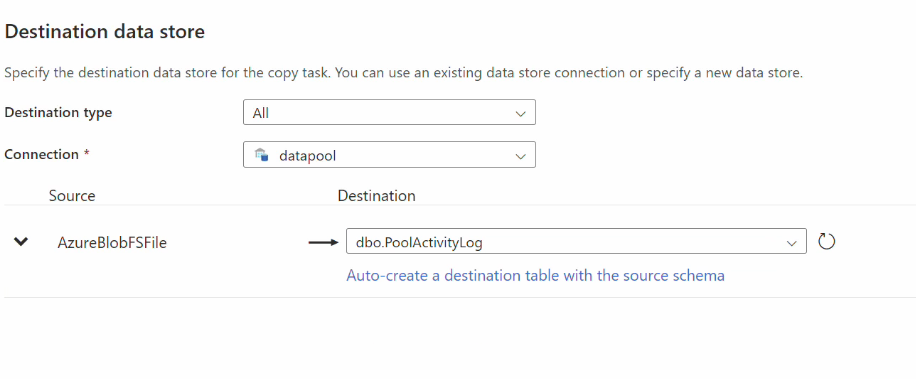

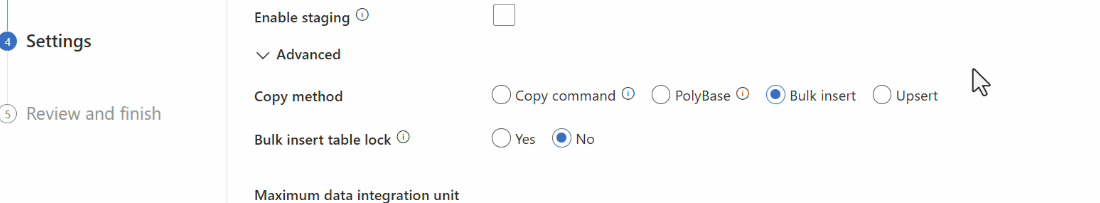

After this just click next and pipeline is created.
<br>Once pipeline is created you can see that in monitor section.
<br>
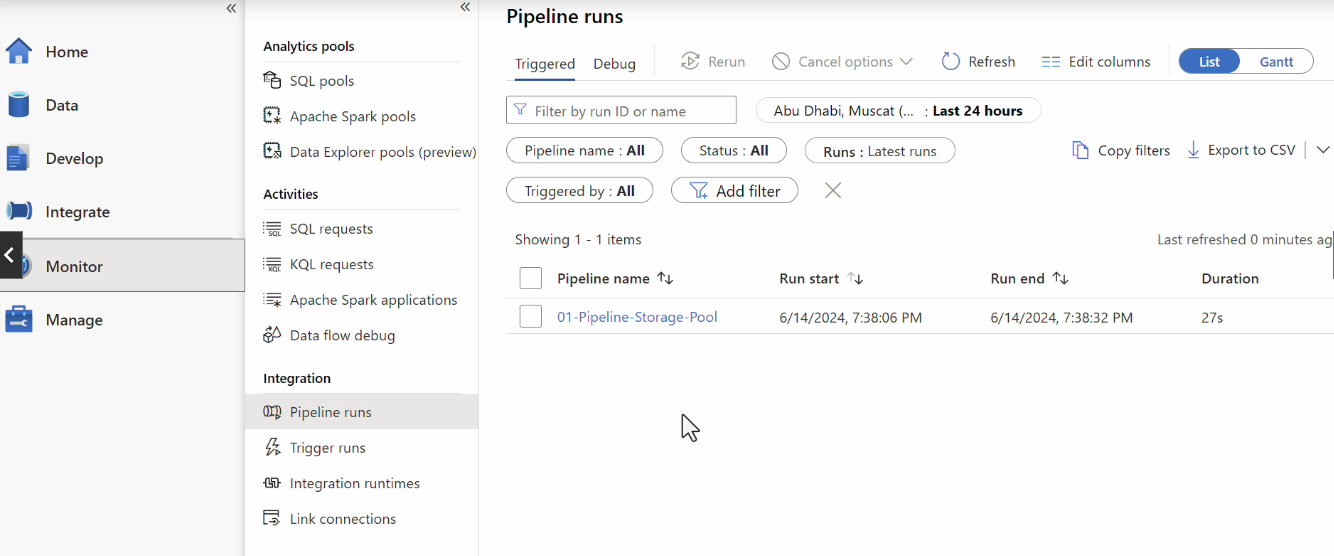

## Loading data - Pipeline Azure SQL Database

- Like earlier mentioned step go to Integrate tab
- in that use the Copy data tool 
- use just for once in properties tab.
- Click on new connection and Azure SQL Databse

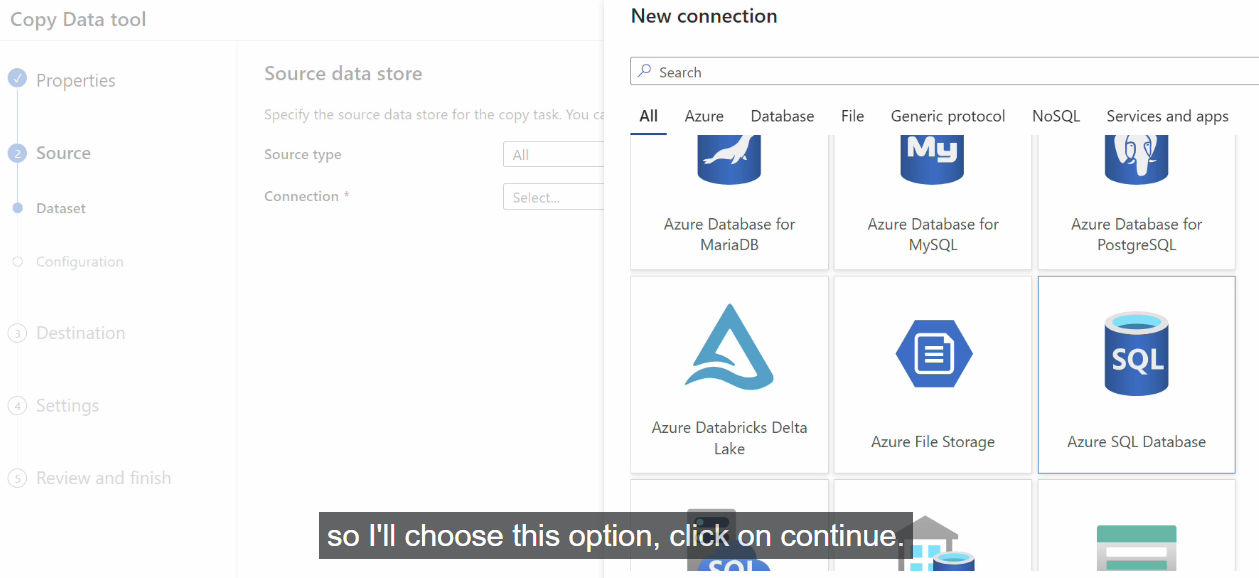

- so if you already have sqlserver created in azure you can use that source. 
- once you select subcription , select server name and db name 

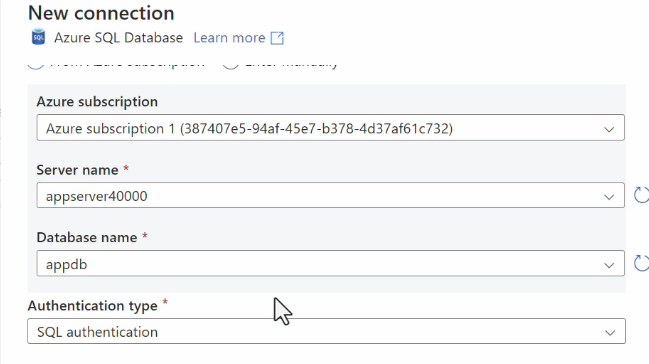

- after this insert username and password which you have given during Azure SQL DB.
- if by any chance you are not able to connect then check firewall setting which is there as set server firewall and then check following  mentioned in image

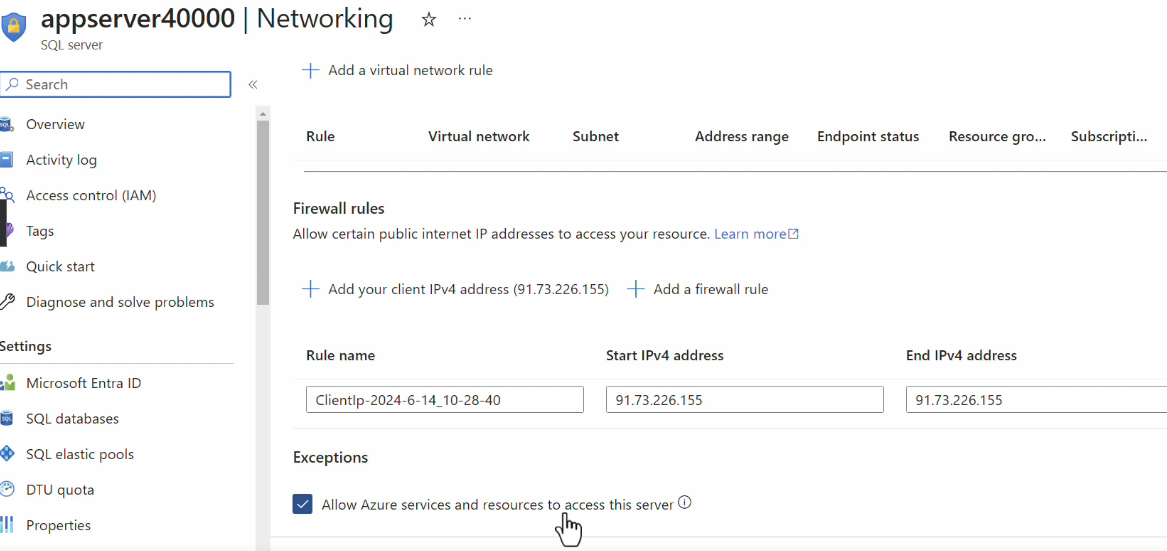

- then it will show the SQL tables present inside the Azure SQL select one of them which you want copy

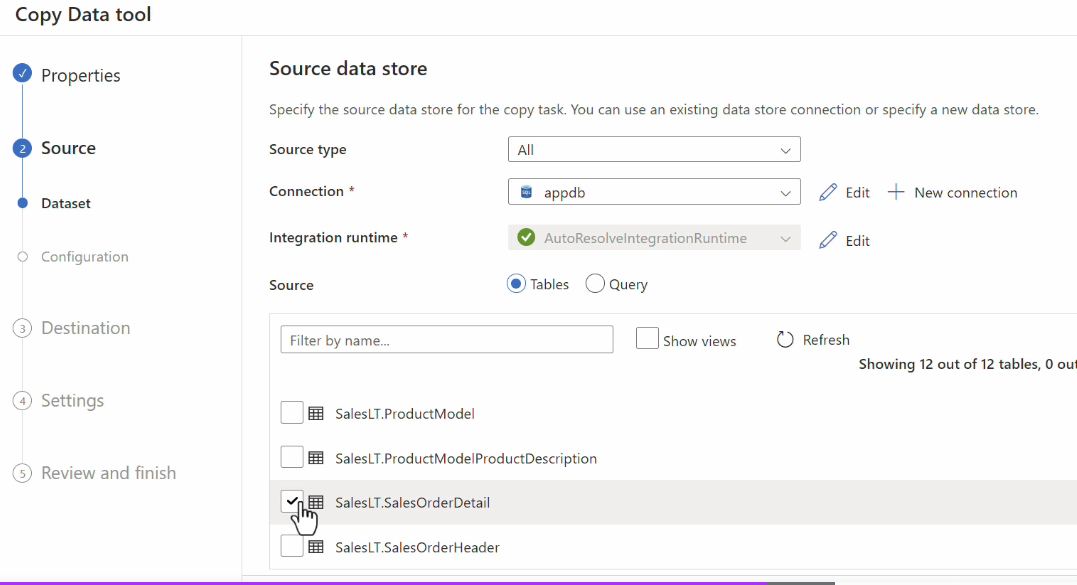

- it will go to destination tab there you select destination as datapool and as table is not there it will create automatically

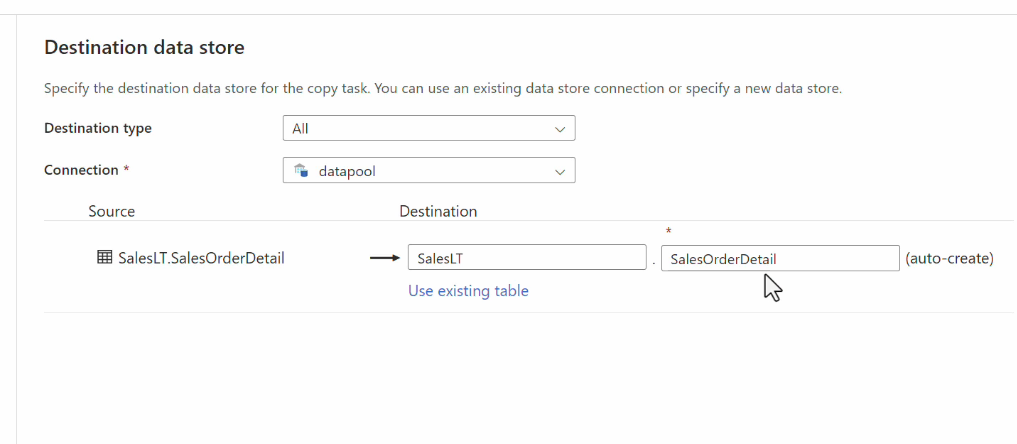

- Give name to pipe line and selct bulk insert. Pipeline is successfully created.
